# Imports

In [2]:
# Import standard libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Date
import datetime as dt
import time
from datetime import timedelta

In [4]:
silver = pd.read_csv('Acuity.csv')
sub_20191 = pd.read_csv('2019-1.csv')
sub_20192 = pd.read_csv('2019-2.csv')
sub_2020 = pd.read_csv('2020.csv')
sub_2021 = pd.read_csv('2021.csv')

## Acuity

In [5]:
# Create a copy of the DB
silver_acuity = silver.copy()
silver_acuity.shape

(26176, 20)

In [6]:
# Change dates to datetime Dtype
silver_acuity['APPOINTMENT_BODY_DATE'] = pd.to_datetime(silver_acuity['APPOINTMENT_BODY_DATE'])

# Drop unneeded columns
silver_acuity.drop(columns=['EVENT_TS', 'EVENT_TS_UTC', 'ANONYMOUS_ID','APPOINTMENT_BODY_FIRST_NAME',
       'APPOINTMENT_BODY_DATETIME_CREATED', 'APPOINTMENT_BODY_CALENDAR_ID','APPOINTMENT_BODY_CALENDAR_TIMEZONE',\
                    'APPOINTMENT_BODY_TIMEZONE', 'APPOINTMENT_BODY_LAST_NAME', 'APPOINTMENT_BODY_ID',\
                    'APPOINTMENT_BODY_NO_SHOW', \
                    'APPOINTMENT_TYPE_ID'], inplace=True)

silver_acuity['EVENT'].value_counts()

appointment_changed        19261
appointment_scheduled       5664
appointment_rescheduled      774
appointment_canceled         477
Name: EVENT, dtype: int64

In [7]:
# drop irrelevant appointments
na_dict= {'appointment_canceled' : np.nan,
'appointment_changed' : np.nan,
'appointment_rescheduled' : np.nan}

silver_acuity['EVENT'].replace(na_dict, inplace = True)
silver_acuity.dropna(inplace = True)
silver_acuity['EVENT'].value_counts()

appointment_scheduled    5549
Name: EVENT, dtype: int64

In [8]:
silver_acuity['APPOINTMENT_BODY_CANCELED'].value_counts()

False    5548
True        1
Name: APPOINTMENT_BODY_CANCELED, dtype: int64

In [9]:
silver_acuity['APPOINTMENT_BODY_TYPE'].value_counts()

Hair Consultation                      4680
Hair Mineral Analysis Appointment       648
Follow Up Consultation                  147
Customer consultation                    66
Case Study                                5
Hair Mineral Analysis - Acquisition       3
Name: APPOINTMENT_BODY_TYPE, dtype: int64

In [10]:
# drop irrelevant appointments
na_dict= {'Hair Mineral Analysis - Acquisition':np.nan,
          'Follow Up Consultation':np.nan,
          'Customer consultation':np.nan,
          'Case Study':np.nan}

silver_acuity['APPOINTMENT_BODY_TYPE'].replace(na_dict, inplace = True)
silver_acuity.dropna(inplace = True)
silver_acuity['APPOINTMENT_BODY_TYPE'].value_counts()

Hair Consultation                    4680
Hair Mineral Analysis Appointment     648
Name: APPOINTMENT_BODY_TYPE, dtype: int64

In [11]:
silver_acuity.shape

(5328, 8)

In [12]:
#Round to the day
silver_acuity['APPOINTMENT_BODY_DATE'] = silver_acuity['APPOINTMENT_BODY_DATE'].dt.round('D')

silver_acuity['Today'] = pd.Timestamp('today')
silver_acuity['Today'] = silver_acuity['Today'].dt.round('D')

silver_acuity['Complete'] = (silver_acuity['Today']>silver_acuity['APPOINTMENT_BODY_DATE'])
silver_acuity['Complete'].value_counts()

True     4667
False     661
Name: Complete, dtype: int64

In [13]:
# Remove appointments in the future
silver_acuity['Complete'] = silver_acuity['Complete'].astype('str')

# drop irrelevant appointments
na_dict= {'False' : np.nan}

silver_acuity['Complete'].replace(na_dict, inplace = True)
silver_acuity.dropna(inplace = True)
silver_acuity['Complete'].value_counts()

True    4667
Name: Complete, dtype: int64

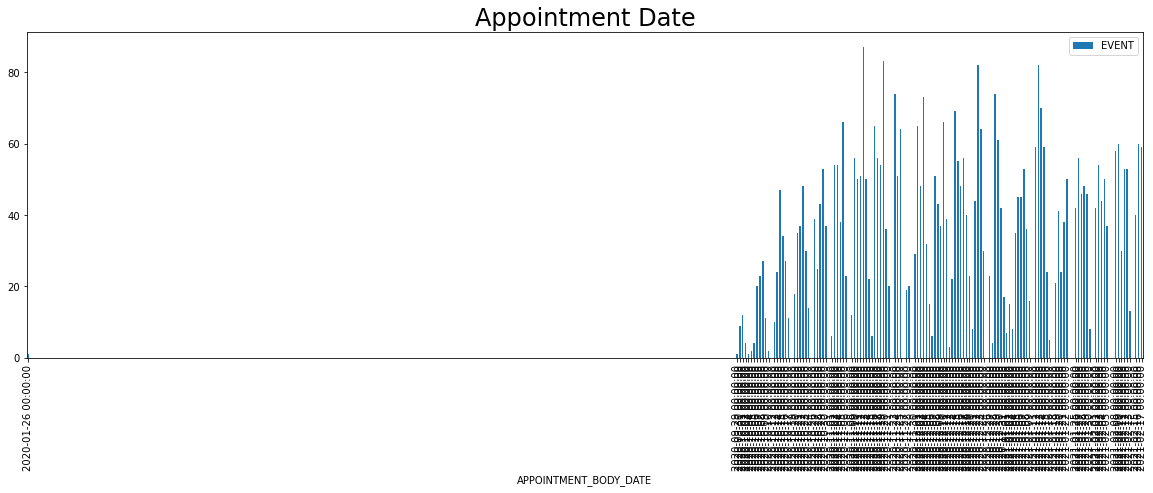

In [14]:
# Group by event, for a visual only 
chart = silver_acuity.groupby(["APPOINTMENT_BODY_DATE"]).agg({'EVENT':'count'})
chart.isna().sum()

chart.plot(kind='bar',figsize=(20,6))
plt.title("Appointment Date", size= 24)
plt.show()

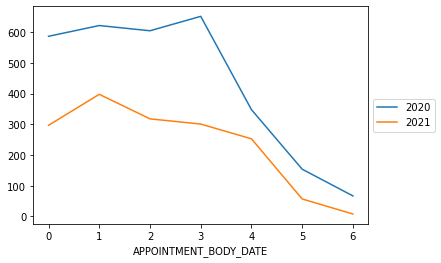

In [15]:
(silver_acuity.groupby([silver_acuity['APPOINTMENT_BODY_DATE'].dt.dayofweek,\
                       silver_acuity['APPOINTMENT_BODY_DATE'].dt.year])\
 ['EVENT'].count()).unstack().plot(kind='line')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [16]:
min(silver_acuity['APPOINTMENT_BODY_DATE'])

Timestamp('2020-01-26 00:00:00')

In [17]:
silver_acuity['APPOINTMENT_BODY_TYPE'].value_counts()

Hair Consultation                    4087
Hair Mineral Analysis Appointment     580
Name: APPOINTMENT_BODY_TYPE, dtype: int64

In [18]:
#QA instances
smail = silver_acuity['EMAIL'].nunique()
print ('unique emails = ',smail)

unique emails =  4014


In [19]:
clean_acuity = silver_acuity.groupby('EMAIL').agg({"APPOINTMENT_BODY_DATE":'min',\
                                'APPOINTMENT_BODY_TYPE':'last',\
                                'APPOINTMENT_BODY_CALENDAR':'last'\
                               })
clean_acuity.shape

(4014, 3)

## SUB

In [21]:
sub_2019=pd.merge(sub_20191,sub_20192,how='outer')
print('total',sub_2019.shape)
print('1',sub_20191.shape)
print('2',sub_20192.shape)

# Change dates to datetime
sub_2019['FIRST_ORDER_AT'] = pd.to_datetime(sub_2019['FIRST_ORDER_AT'])
sub_2020['FIRST_ORDER_AT'] = pd.to_datetime(sub_2020['FIRST_ORDER_AT'])
sub_2021['FIRST_ORDER_AT'] = pd.to_datetime(sub_2021['FIRST_ORDER_AT'])

total (1147363, 7)
1 (506714, 7)
2 (640649, 7)


In [22]:
# min(gold['FIRST_ORDER_AT'])
# max(gold['FIRST_ORDER_AT'])

s19 = sub_2019.shape
email19 = sub_2019['EMAIL'].nunique()
print ('2019 = ',s19)
print ('2019 unique emails = ',email19)

s20 = sub_2020.shape
email20 = sub_2020['EMAIL'].nunique()
print ('2020 = ',s20)
print ('2020 unique emails = ',email20)

s21 = sub_2021.shape
email21 = sub_2021['EMAIL'].nunique()
print ('2021 = ',s21)
print ('2021 unique emails = ',email21)

2019 =  (1147363, 7)
2019 unique emails =  49744
2020 =  (727153, 7)
2020 unique emails =  82292
2021 =  (34172, 7)
2021 unique emails =  19819


In [23]:
# Aggregate
df19 = sub_2019.groupby('EMAIL').agg({"FIRST_ORDER_AT":'min',\
                                'TOTAL_ORDER_VALUE':'mean',\
                                'TOTAL_ORDERS':'mean'\
                                ,'ITEM_GENDER':'last',\
                                'ITEM_SUB_TYPE':'last',\
                                'ITEM_PRODUCT_CORE_CATEGORY':'last'\
                               })
df19.shape

(49744, 6)

In [24]:
# Aggregate
df20 = sub_2020.groupby('EMAIL').agg({"FIRST_ORDER_AT":'min',\
                                'TOTAL_ORDER_VALUE':'mean',\
                                'TOTAL_ORDERS':'mean'\
                                ,'ITEM_GENDER':'last',\
                                'ITEM_SUB_TYPE':'last',\
                                'ITEM_PRODUCT_CORE_CATEGORY':'last'\
                               })
df20.shape

(82292, 6)

In [25]:
# Aggregate
df21 = sub_2021.groupby('EMAIL').agg({"FIRST_ORDER_AT":'min',\
                                'TOTAL_ORDER_VALUE':'mean',\
                                'TOTAL_ORDERS':'mean'\
                                ,'ITEM_GENDER':'last',\
                                'ITEM_SUB_TYPE':'last',\
                                'ITEM_PRODUCT_CORE_CATEGORY':'last'\
                               })
df21.shape

(19819, 6)

In [26]:
df19.describe()

,TOTAL_ORDER_VALUE,TOTAL_ORDERS
count,49742.000000,49742.000000
mean,591.101872,7.028949
std,502.377704,5.712858
min,-32.000000,1.000000
25%,198.000000,2.000000
50%,404.000000,5.000000
75%,881.000000,10.000000
max,5688.000000,47.000000


In [27]:
df20.describe()

,TOTAL_ORDER_VALUE,TOTAL_ORDERS
count,82277.000000,82277.000000
mean,368.919930,4.458694
std,259.610407,2.859405
min,-32.000000,1.000000
25%,168.000000,2.000000
50%,306.000000,4.000000
75%,495.000000,6.000000
max,3777.000000,61.000000


In [28]:
df21.describe()

,TOTAL_ORDER_VALUE,TOTAL_ORDERS
count,19817.000000,19817.000000
mean,111.141881,1.329969
std,64.738798,0.499764
min,0.000000,1.000000
25%,79.000000,1.000000
50%,79.000000,1.000000
75%,158.000000,2.000000
max,1864.400000,8.000000


In [30]:
sub2=pd.merge(sub_2020,sub_2021,how='outer')
sub3=pd.merge(sub_2019,sub2,how='outer')

In [31]:
sub3 = sub3.groupby('EMAIL').agg({"FIRST_ORDER_AT":'min',\
                                'TOTAL_ORDER_VALUE':'mean',\
                                'TOTAL_ORDERS':'mean'\
                                ,'ITEM_GENDER':'last',\
                                'ITEM_SUB_TYPE':'last',\
                                'ITEM_PRODUCT_CORE_CATEGORY':'last'\
                               })
sub3.shape

(151855, 6)

In [32]:
df20.ITEM_SUB_TYPE.value_counts()

GrowthPlan                                             47413
GrowthPlan 3                                           23282
GrowthPlan 2                                           10325
GrowthPlan,GrowthPlan                                    713
GrowthPlan,GrowthPlan 3                                   85
GrowthPlan 3,GrowthPlan                                   80
GrowthPlan 3,GrowthPlan 3                                 76
GrowthPlan,GrowthPlan 2                                   42
Non-Sub,GrowthPlan                                        39
GrowthPlan,Non-Sub                                        38
GrowthPlan 2,GrowthPlan                                   37
GrowthPlan 2,GrowthPlan 2                                 31
GrowthPlan 2,GrowthPlan 3                                 20
GrowthPlan 3,Non-Sub                                      18
GrowthPlan 3,GrowthPlan 2                                 17
Non-Sub,GrowthPlan 3                                      17
GrowthPlan,GrowthPlan,Gr

In [33]:
sub3.ITEM_SUB_TYPE.value_counts()

GrowthPlan                                             88928
GrowthPlan 3                                           47306
GrowthPlan 2                                           13536
GrowthPlan,GrowthPlan                                   1167
GrowthPlan 3,GrowthPlan                                  157
GrowthPlan,GrowthPlan 3                                  150
GrowthPlan 3,GrowthPlan 3                                115
GrowthPlan,Non-Sub                                        61
Non-Sub,GrowthPlan                                        55
GrowthPlan,GrowthPlan 2                                   54
GrowthPlan 2,GrowthPlan                                   52
GrowthPlan 3,Non-Sub                                      44
Prepay 6                                                  43
GrowthPlan 2,GrowthPlan 2                                 42
Non-Sub,GrowthPlan 3                                      38
GrowthPlan 2,GrowthPlan 3                                 24
GrowthPlan,GrowthPlan,Gr

In [34]:
sub3.describe()

,TOTAL_ORDER_VALUE,TOTAL_ORDERS
count,151836.000000,151836.000000
mean,408.063391,4.892371
std,378.234723,4.290529
min,-32.000000,1.000000
25%,158.000000,2.000000
50%,296.250000,3.000000
75%,553.000000,6.000000
max,5688.000000,61.000000


## Merge

In [35]:
sub = pd.merge(clean_acuity,sub3, how='left',on='EMAIL',copy=False)
sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4014 entries, 01hookerville@gmail.com to zusette1950@yahoo.com
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   APPOINTMENT_BODY_DATE       4014 non-null   datetime64[ns]
 1   APPOINTMENT_BODY_TYPE       4014 non-null   object        
 2   APPOINTMENT_BODY_CALENDAR   4014 non-null   object        
 3   FIRST_ORDER_AT              3036 non-null   datetime64[ns]
 4   TOTAL_ORDER_VALUE           3036 non-null   float64       
 5   TOTAL_ORDERS                3036 non-null   float64       
 6   ITEM_GENDER                 3036 non-null   object        
 7   ITEM_SUB_TYPE               3036 non-null   object        
 8   ITEM_PRODUCT_CORE_CATEGORY  3036 non-null   object        
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 313.6+ KB


In [36]:
# clean up item sub
sub.loc[sub['ITEM_SUB_TYPE'] =='GrowthPlan,GrowthPlan']= 'GrowthPlan'
sub.loc[sub['ITEM_SUB_TYPE'] =='GrowthPlan 3,GrowthPlan 3']= 'GrowthPlan 3'
sub.loc[sub['ITEM_SUB_TYPE'] =='GrowthPlan,GrowthPlan 3']= 'GrowthPlan'
sub.loc[sub['ITEM_SUB_TYPE'] =='GrowthPlan 2,GrowthPlan']= 'GrowthPlan 2'
sub.loc[sub['ITEM_SUB_TYPE'] =='GrowthPlan 3,GrowthPlan 2']= 'GrowthPlan 3'
sub.loc[sub['ITEM_SUB_TYPE'] =='GrowthPlan,GrowthPlan 2']= 'GrowthPlan'
sub.loc[sub['ITEM_SUB_TYPE'] =='GrowthPlan 3,GrowthPlan']= 'GrowthPlan 3'
sub.loc[sub['ITEM_SUB_TYPE'] =='GrowthPlan 2,GrowthPlan 2']= 'GrowthPlan 2'
sub.loc[sub['ITEM_SUB_TYPE'] =='GrowthPlan 3,Non-Sub']= 'GrowthPlan 3'

sub['ITEM_SUB_TYPE'].value_counts()

GrowthPlan      1386
GrowthPlan 3    1066
GrowthPlan 2     584
Name: ITEM_SUB_TYPE, dtype: int64

In [37]:
sub.loc[sub['ITEM_PRODUCT_CORE_CATEGORY'] =='Men,Men']= 'Men'
sub.loc[sub['ITEM_PRODUCT_CORE_CATEGORY'] =='GrowthPlan']= 'Balance'
sub.loc[sub['ITEM_PRODUCT_CORE_CATEGORY'] =='GrowthPlan 2']= 'Balance'
sub.loc[sub['ITEM_PRODUCT_CORE_CATEGORY'] =='GrowthPlan 3']= 'Balance'

sub['ITEM_PRODUCT_CORE_CATEGORY'].value_counts()

Women      1496
Balance    1037
Men         503
Name: ITEM_PRODUCT_CORE_CATEGORY, dtype: int64

In [38]:
# Export data
sub.to_csv('sub.csv')

In [39]:
sub.describe()

,APPOINTMENT_BODY_DATE,APPOINTMENT_BODY_TYPE,APPOINTMENT_BODY_CALENDAR,FIRST_ORDER_AT,TOTAL_ORDER_VALUE,TOTAL_ORDERS,ITEM_GENDER,ITEM_SUB_TYPE,ITEM_PRODUCT_CORE_CATEGORY
count,4014,4014,4014,3036,3036.0,3036.0,3036,3036,3036
unique,128,4,12,3011,687.0,28.0,3,5,3
top,2020-11-12 00:00:00,Hair Consultation,"Dr. Ariana Zastrow, ND",Balance,158.0,2.0,Women,GrowthPlan,Women
freq,76,3532,708,25,134.0,601.0,2508,1372,1496
